In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("./app_build/MDSInc_sales.xlsx", sheet_name="sales")

In [3]:
df.shape

(33759, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33759 entries, 0 to 33758
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        33759 non-null  object 
 1   order_date      33759 non-null  object 
 2   ship_date       33759 non-null  object 
 3   ship_mode       33759 non-null  object 
 4   customer_name   33759 non-null  object 
 5   segment         33759 non-null  object 
 6   state           33759 non-null  object 
 7   country         33759 non-null  object 
 8   market          33759 non-null  object 
 9   region          33759 non-null  object 
 10  product_id      33759 non-null  object 
 11  category        33759 non-null  object 
 12  sub_category    33759 non-null  object 
 13  product_name    33759 non-null  object 
 14  sales           33759 non-null  int64  
 15  quantity        33759 non-null  int64  
 16  discount        33759 non-null  float64
 17  profit          33759 non-null 

In [5]:
df.describe().T.style.background_gradient(subset=['25%','75%'], cmap='Greys')

,count,mean,std,min,25%,50%,75%,max
sales,33759.000000,247.130069,492.653965,1.000000,31.000000,85.000000,251.000000,22638.000000
quantity,33759.000000,3.486181,2.272437,1.000000,2.000000,3.000000,5.000000,14.000000
discount,33759.000000,0.142708,0.212516,0.000000,0.000000,0.000000,0.200000,0.850000
profit,33759.000000,28.581085,174.499684,-6599.978000,0.000000,9.264000,36.810000,8399.976000
shipping_cost,33759.000000,26.431853,57.683970,0.000000,2.630000,7.820000,24.445000,933.570000


## Handling the missing values

In [6]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
dtype: int64

=> Không có giá trị bị thiếu ở đây

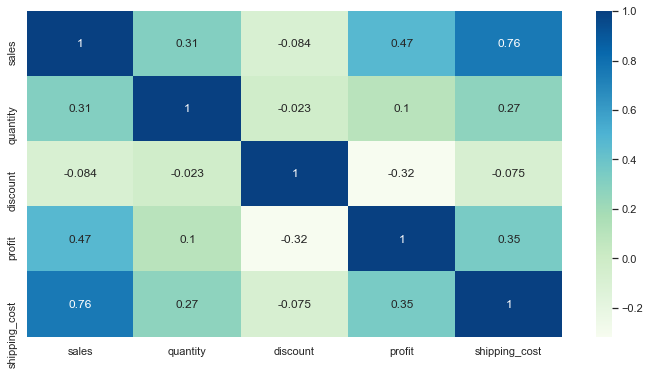

In [7]:
plt.figure(figsize=(12,6))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap = 'GnBu')

In [8]:
df.duplicated().sum()

0

## Bây giờ chúng ta sẽ tạo cột Profit Margin, công thức là (Profit / Sales) *100

In [9]:
df['Profit Margin %'] = (df.profit / df.sales) * 100
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,Profit Margin %
0,AG-2011-2040,2011-01-01 00:00:00,2011-06-01 00:00:00,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,26.014706
1,IN-2011-47883,2011-01-01 00:00:00,2011-08-01 00:00:00,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,30.030000
2,HU-2011-1220,2011-01-01 00:00:00,2011-05-01 00:00:00,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,44.909091
3,IT-2011-3647632,2011-01-01 00:00:00,2011-05-01 00:00:00,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,-57.900000
4,IN-2011-47883,2011-01-01 00:00:00,2011-08-01 00:00:00,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,33.131579


In [10]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,33759,16504,IN-2013-42311,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date,33759,1069,20-09-2013,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ship_date,33759,1099,2013-01-07 00:00:00,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ship_mode,33759,4,Standard Class,20336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_name,33759,795,Steven Ward,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
segment,33759,3,Consumer,17583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,33759,1019,California,1336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,33759,146,United States,6675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market,33759,7,APAC,7206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,33759,13,Central,7366,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Có 3 danh mục mặt hàng với 17 danh mục phụ. 60% đơn đặt hàng dành cho "Office Supplies" và ít nhất 11% đơn mua hàng dành cho "Binders".
- Có 4 phương thức ship và 3 phân khúc khách hàng. Gần một nửa số đơn đặt hàng là từ phân khúc "Consumer" sử dụng phương thức chuyển hàng của "Standard Class".
- 75% đơn đặt hàng tạo ra ít nhất 34% lợi nhuận.
- Các lệnh thua lỗ có thể lên tới -473%. Chúng ta phải nhấn mạnh vào những vụ bán hàng thua lỗ này để cắt bỏ chúng.

### A. Which Category is Best Selling and Most Profitable?

In [11]:
df1 = pd.DataFrame(df.groupby(['category'])[['sales', 'profit', 'quantity']].sum())
df1

,sales,profit,quantity
category,,,
Furniture,2732823,197470.19090,23288
Office Supplies,2481548,338547.77790,71258
Technology,3128493,428850.88202,23144


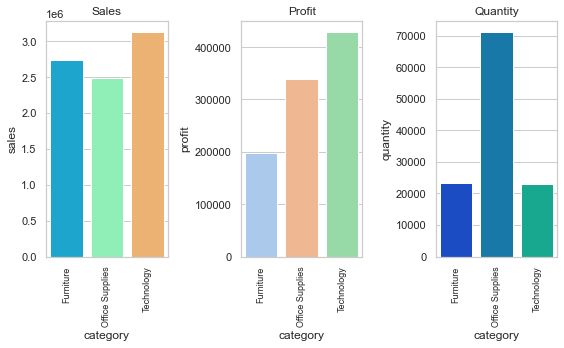

In [14]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))
# Plot barplots
cat1 = sns.barplot(x = df1.index, y = df1.sales, ax=axis[0], palette = "rainbow")
cat2 = sns.barplot(x = df1.index, y = df1.profit, ax=axis[1], palette = "pastel")
cat3 = sns.barplot(x = df1.index, y = df1.quantity, ax=axis[2], palette = "winter")
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()

- Tất cả 3 danh mục - "Fumiture" và "Office Supplies" đều có doanh số bán hàng tương tự nhau nhưng doanh số "Technology" thì cách xa
- "Technology" là Bán chạy nhất và thật tốt khi biết rằng danh mục này cũng là Danh mục có khả năng sinh lời cao nhất. Chỉ bán số lượng tối thiểu vì những sản phẩm này thường được mua một lần và có thể sử dụng ít nhất 4–5 năm.
- "Fumiture" là thứ ít sinh lời nhất và số lượng bán ra cũng ở mức tối thiểu.
- "Office Supplies" bán nhiều nhất về số lượng vì đây là sản phẩm tương đối rẻ.

### B. What are the Best Selling and Most Profitable Sub-Category?

In [15]:
df2 = pd.DataFrame(df.groupby(['sub_category'])[['sales', 'profit']].sum())
subcat_df2 = pd.DataFrame(df2.sort_values('sales', ascending = False))
subcat_df2

,sales,profit
sub_category,,
Phones,1154861,146059.36450
Chairs,1008302,100725.52590
Copiers,959057,154519.01222
Bookcases,953375,98705.36900
Storage,743681,69444.53770
Appliances,651290,88640.08890
Machines,518785,40240.12770
Tables,513574,-33537.48030
Accessories,495790,88032.37760


In [16]:
subcat_profit_df2 = pd.DataFrame(subcat_df2.sort_values('profit', ascending = False))
subcat_profit_df2

,sales,profit
sub_category,,
Copiers,959057,154519.01222
Phones,1154861,146059.36450
Chairs,1008302,100725.52590
Bookcases,953375,98705.36900
Appliances,651290,88640.08890
Accessories,495790,88032.37760
Storage,743681,69444.53770
Binders,301511,50093.35560
Machines,518785,40240.12770


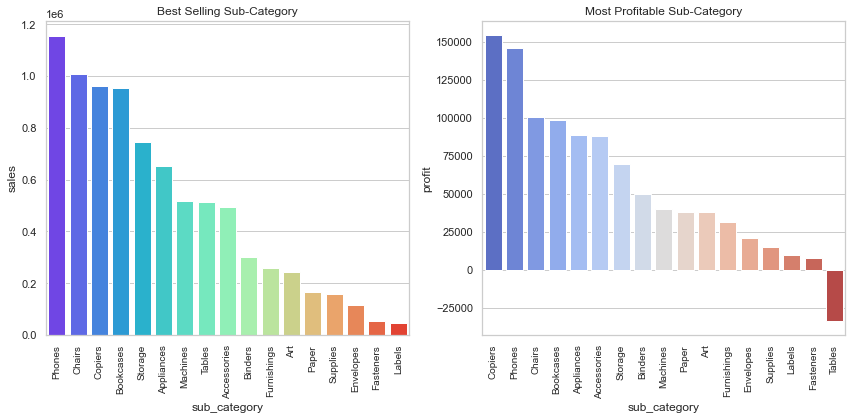

In [17]:
sns.set_theme(style="whitegrid")


figure, axis = plt.subplots(1, 2, figsize=(12, 6))

subcat1 = sns.barplot(data = subcat_df2, x = subcat_df2.index, y = subcat_df2.sales, ax=axis[0], palette = "rainbow")
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

subcat2 = sns.barplot(data = subcat_profit_df2, x = subcat_profit_df2.index, y = subcat_profit_df2.profit, ax=axis[1], palette = "coolwarm")
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

figure.tight_layout()

plt.show()

- "Phones" và "Chairs" là Top 2 danh mục con bán chạy nhất.

- "Copiers" tạo ra nhiều lợi nhuận nhất, tiếp theo là "Phones", "Chairs", "Bookcasses" và "Appliances". Chiến lược tiếp thị phải tập trung vào việc tiếp thị các sản phẩm này.

- Ở đầu bên kia của quang phổ "Tables" làm cho mức lỗ bé hơn không. Đây là những sản phẩm mà có thể xem xét loại bỏ khỏi danh mục sản phẩm hoặc tăng giá bán và tỷ suất lợi nhuận hoặc mặc cả để có giá thấp hơn từ nhà cung cấp.

### C. Which is the Top Selling Sub-Category?

In [18]:
df3 = pd.DataFrame(df.groupby(['sub_category'])[['quantity']].sum().sort_values('quantity',ascending=False))
df3

,quantity
sub_category,
Binders,14019
Storage,11188
Art,10667
Paper,8715
Chairs,8302
Phones,7934
Furnishings,7530
Accessories,7226
Labels,6027


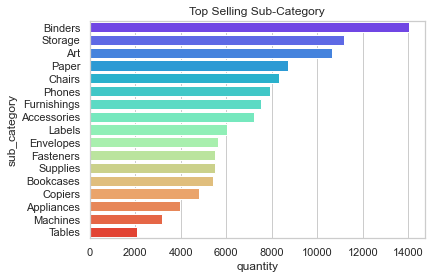

In [20]:
sns.set_theme(style="whitegrid")
sns.barplot(data = df3, y = df3.index, x = df3.quantity, palette = "rainbow")
plt.title("Top Selling Sub-Category")
plt.show()

- Phải đảm bảo hàng tồn kho luôn được dự trữ đầy đủ cho danh mục phụ bán chạy nhất như "Binders", "Storage", "Art" và "Paper".


### D. Which Customer Segment is Most Profitable?

In [21]:
df4 = pd.DataFrame(df.groupby(['segment'])[['profit']].sum())
df4

,profit
segment,
Consumer,491564.41898
Corporate,302589.10474
Home Office,170715.32710


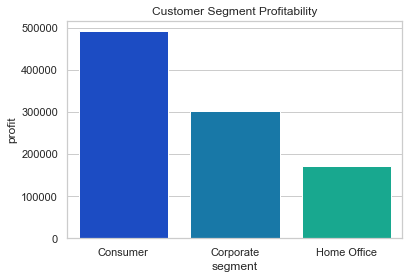

In [23]:
sns.set_theme(style="whitegrid")
sns.barplot(data = df4, x = df4.index, y = df4.profit, palette = "winter")
plt.title("Customer Segment Profitability")
plt.show()

=> Phân khúc "Consumer" mang lại nhiều lợi nhuận nhất, tiếp theo là "Coporate" và "Home Office". Do đó, chiến lược tiếp thị phải nhắm mục tiêu hoặc tập trung nhiều hơn vào việc giữ chân khách hàng của Phân khúc người tiêu dùng và doanh nghiệp.

### E. Which is the Preferred Ship Mode?

/Users/maichienvithien/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


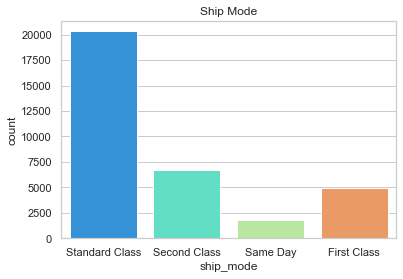

In [24]:
sns.set_theme(style="whitegrid")
sns.countplot(df['ship_mode'], palette = "rainbow")
plt.title("Ship Mode")
plt.show()

- "Standard Class" là phương thức vận chuyển ưa thích và có lẽ cũng là phương thức rẻ nhất. Các chế độ khác không phổ biến đối với khách hàng và có thể quá tốn kém.

### F. Which Region is the Most Profitable?¶

In [25]:
df5 = pd.DataFrame(df.groupby(['region'])['profit'].sum().reset_index())
df5

,region,profit
0,Africa,49540.16100
1,Canada,11824.38000
2,Caribbean,22038.70524
3,Central,213680.41002
4,Central Asia,84932.70900
5,EMEA,21297.64800
6,East,58327.43380
7,North,137939.60400
8,North Asia,112807.98000
9,Oceania,90235.06600


In [29]:
import plotly.express as px
fig = px.pie(df5, values='profit', names='region', 
             title='Most Profitable by Region', 
             hole=0, color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### G. Which Country has the Highest Number of Sales?

In [30]:
country_sales_df = pd.DataFrame(df.groupby(['country'])['sales', 'quantity'].sum().sort_values('sales',ascending = False))
top10 = country_sales_df[:10]
top10

<ipython-input-30-556df3082d8a>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,sales,quantity
country,,
United States,1563338,25370
Australia,610516,7015
France,550493,6937
China,481616,4788
Mexico,427126,6878
Germany,412324,5326
India,384630,3723
United Kingdom,334565,3802
Indonesia,259552,3337


In [31]:
bottom10 = country_sales_df[-10:]
bottom10

,sales,quantity
country,,
United Arab Emirates,414,18
Burundi,268,4
Swaziland,204,4
Eritrea,188,4
Guinea-Bissau,167,6
Armenia,156,3
Slovenia,153,2
Equatorial Guinea,150,3
Macedonia,64,3


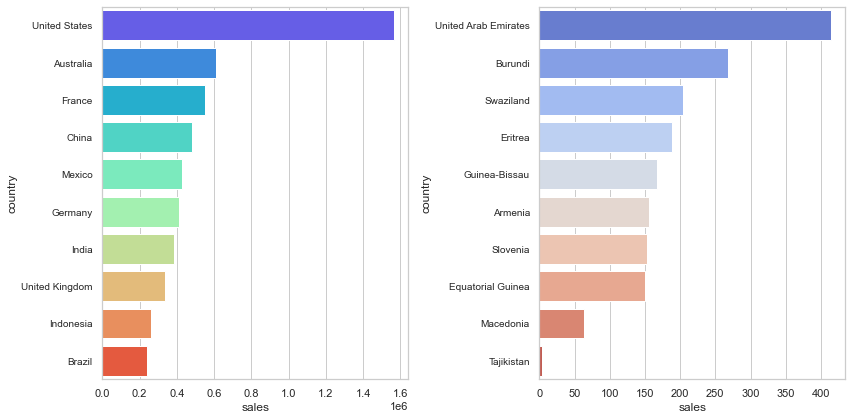

In [32]:
figure, axis = plt.subplots(1,2, figsize=(12, 6))
sns.set_theme(style="whitegrid")

top10c = sns.barplot(data = top10, y = top10.index, x = top10.sales, palette = "rainbow", ax = axis[0])
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)

bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.sales, palette = "coolwarm", ax=axis[1])
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)

figure.tight_layout()
plt.show()

## Recommendations:

- Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.

- Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.

- For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.

- For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.

- Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.